In [2]:
import pandas as pd
df = pd.read_csv('encoded.csv', index_col=0)
df.head()

,date,time,district,n_p,dtp_v,s_pch,osv,change_org_motion,woman_drv,pogoda,driver_narush,alco,posled,sdor
0,2015-05-12,09:20:00,КАШАРСКИЙ,сл Кашары,1,1,2,2,1,1,1,0,1,5
1,2016-03-09,17:20:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,1,5
2,2018-08-19,17:40:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,0,5
3,2018-08-08,14:15:00,КАШАРСКИЙ,NaN,0,1,2,2,1,1,1,0,1,5
4,2015-03-07,21:15:00,КАШАРСКИЙ,NaN,1,1,0,1,0,1,1,1,2,5


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df.date = pd.to_datetime(df.date)
df.head()

,date,time,district,n_p,dtp_v,s_pch,osv,change_org_motion,woman_drv,pogoda,driver_narush,alco,posled,sdor
0,2015-05-12,09:20:00,КАШАРСКИЙ,сл Кашары,1,1,2,2,1,1,1,0,1,5
1,2016-03-09,17:20:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,1,5
2,2018-08-19,17:40:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,0,5
3,2018-08-08,14:15:00,КАШАРСКИЙ,NaN,0,1,2,2,1,1,1,0,1,5
4,2015-03-07,21:15:00,КАШАРСКИЙ,NaN,1,1,0,1,0,1,1,1,2,5


In [4]:
#Функция построения графика матрицы ошибок
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #if normalize:
        #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Обучаем модель KNN на данных ДТП 2015 года

In [5]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

# Тестируем модель (15) на данных ДТП 2015 года

[[ 2064  1042  2611]
 [  785  8665  1870]
 [ 3012  1785 14947]]


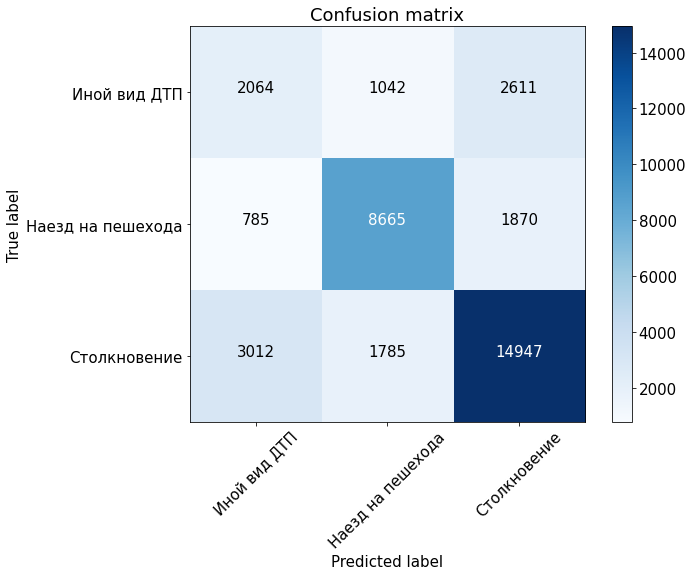

Точность модели составляет : 69.80778119137598


In [7]:
y_pred = knn.predict(X_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y_test,y_pred)*100)

# Тестируем модель (15) на данных ДТП 2016 года

In [8]:
dfl = df[df['date'].dt.year == 2016]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

In [9]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)

[[ 1915  1002  2477]
 [  718  8128  1672]
 [ 2487  1969 14355]]


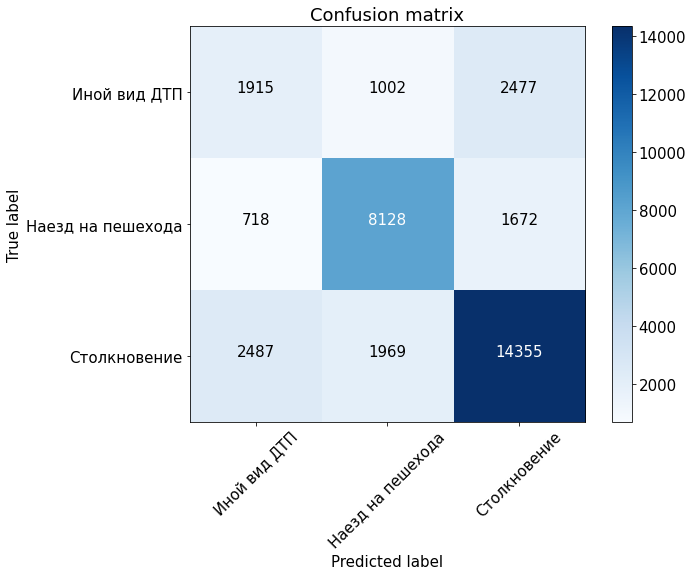

Точность модели составляет : 70.26466607148


In [12]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, prediction)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)

# Тестируем модель (15) на данных ДТП 2017 года

In [13]:
dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

[[ 1755  1022  2406]
 [  668  8270  1574]
 [ 2253  1925 13991]]


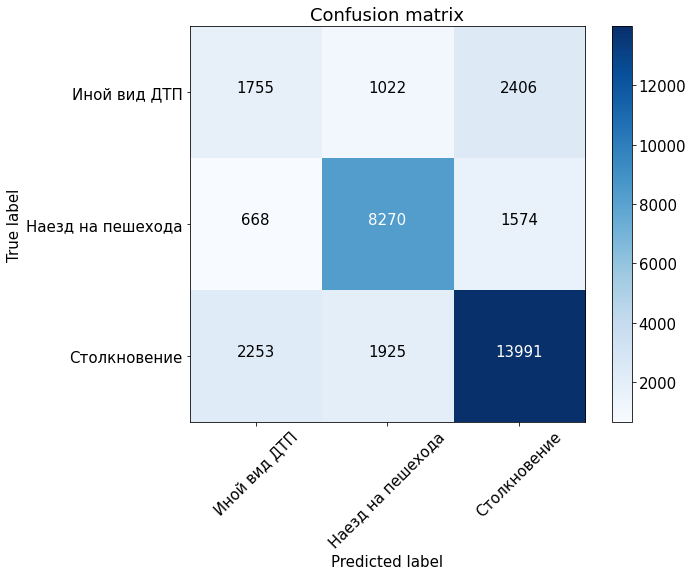

Точность модели составляет : 70.9189699976376


In [14]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, prediction)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)

# Тестируем модель (15) на данных ДТП 2018 года

In [15]:
dfl = df[df['date'].dt.year == 2018]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

[[ 1719  1182  2296]
 [  633  7694  1589]
 [ 2169  2050 14277]]


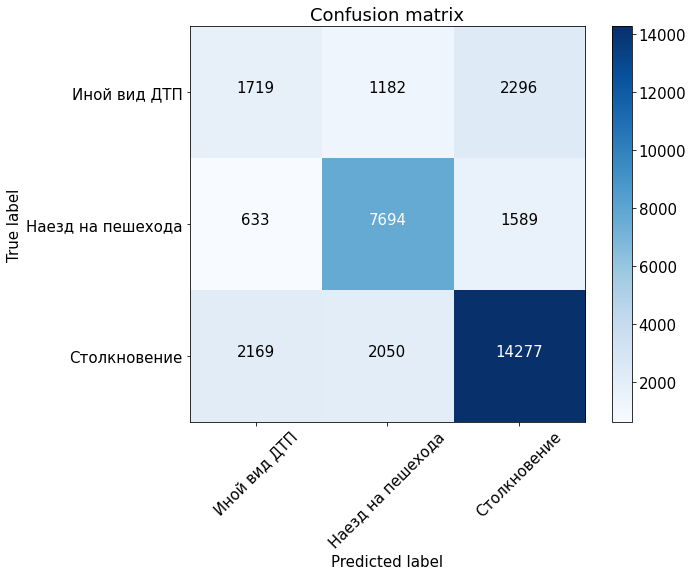

Точность модели составляет : 70.48707191526078


In [16]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, prediction)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)

# Тестируем модель (15) на данных ДТП 2019 года

In [17]:
dfl = df[df['date'].dt.year == 2019]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

[[ 1582   923  2130]
 [  496  6401  1419]
 [ 1827  1895 12755]]


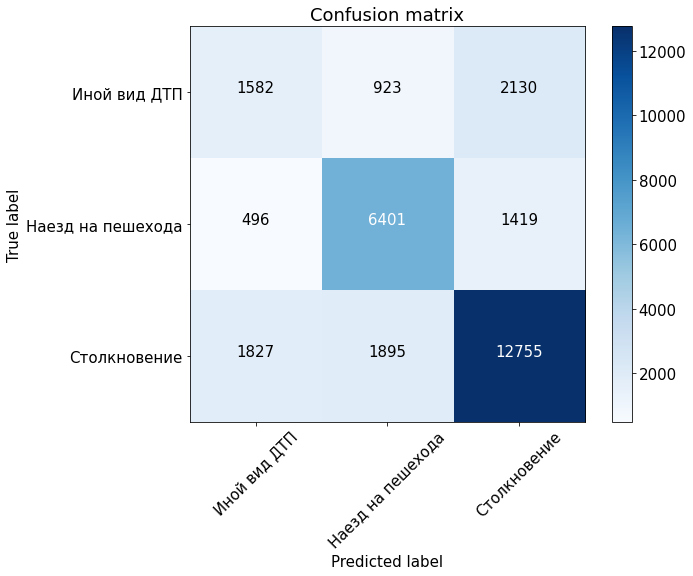

Точность модели составляет : 70.4703003941824


In [18]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, prediction)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)

# Обучаем модель KNN на данных ДТП 2016 года

In [19]:
dfl = df[df['date'].dt.year == 2016]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

# Тестируем модель (16) на данных ДТП 2016 года

[[ 1829   847  2722]
 [  805  7689  2022]
 [ 2392  1723 14694]]


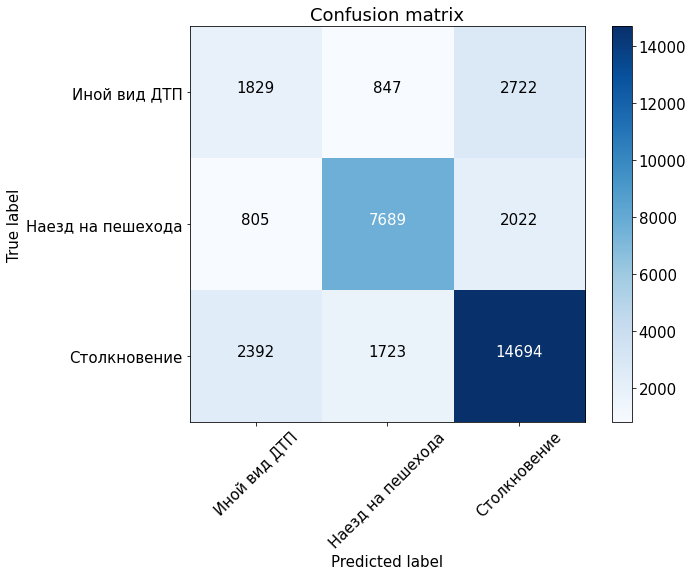

Точность модели составляет : 69.72899807044323


In [21]:
prediction = knn.predict(X_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y_test,prediction)*100)

# Тестируем модель (16) на данных ДТП 2017 года

In [22]:
dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

[[ 1694   913  2544]
 [  731  7654  2038]
 [ 2227  1632 14431]]


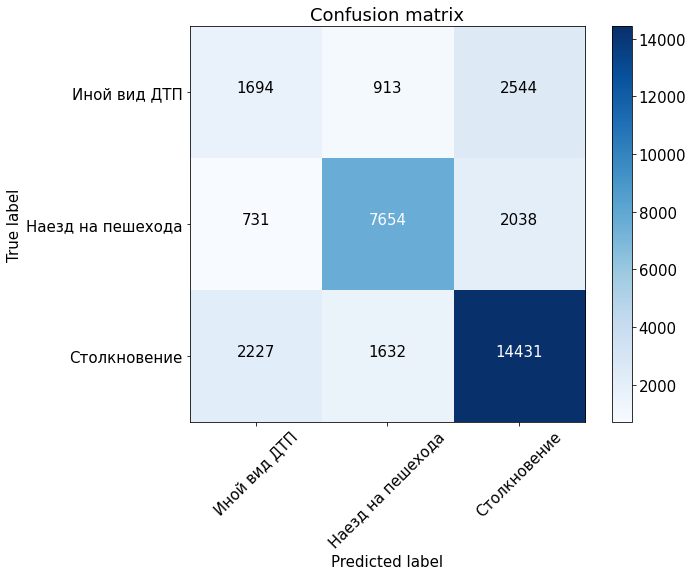

Точность модели составляет : 70.21911174108197


In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, prediction)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)

# Тестируем модель (16) на данных ДТП 2018 года

In [24]:
dfl = df[df['date'].dt.year == 2018]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

[[ 1603   992  2618]
 [  639  6947  2226]
 [ 1944  1691 14949]]


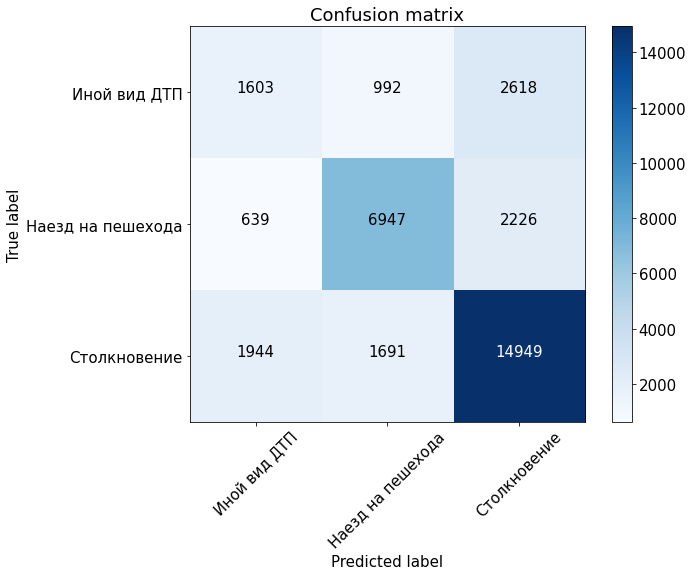

Точность модели составляет : 69.91877175756494


In [25]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, prediction)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)

# Тестируем модель (16) на данных ДТП 2019 года

In [26]:
dfl = df[df['date'].dt.year == 2019]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

[[ 1366   713  2537]
 [  562  5837  1901]
 [ 1703  1545 13264]]


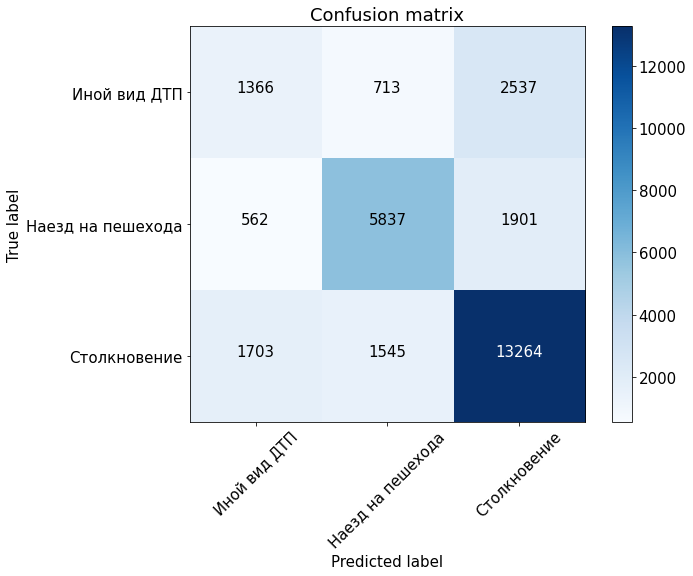

Точность модели составляет : 69.54940872638304


In [27]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, prediction)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)

# Обучаем модель KNN на данных ДТП 2017 года

In [28]:
dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

# Тестируем модель (17) на данных ДТП 2017 года

[[ 1609   980  2516]
 [ 1226  7008  2173]
 [ 2072  2179 14101]]


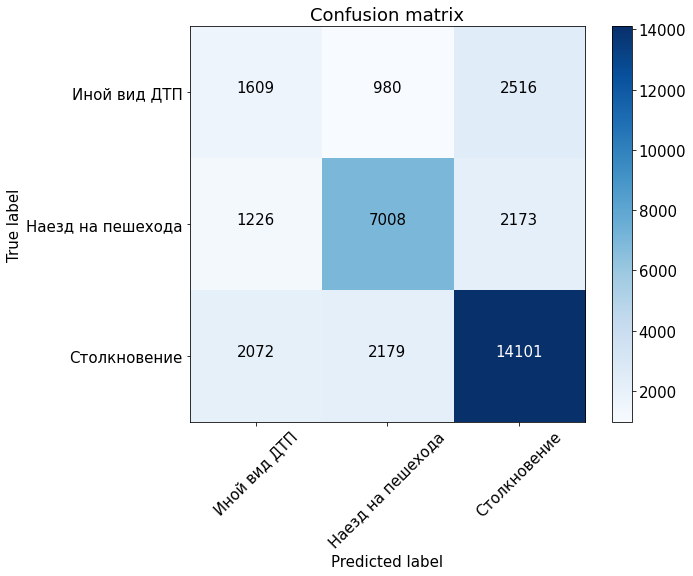

Точность модели составляет : 67.0859910229152


In [30]:
prediction = knn.predict(X_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y_test,prediction)*100)

# Тестируем модель (17) на данных ДТП 2018 года

In [31]:
dfl = df[df['date'].dt.year == 2018]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

[[ 1742  1030  2438]
 [ 1243  6384  2127]
 [ 2108  2170 14367]]


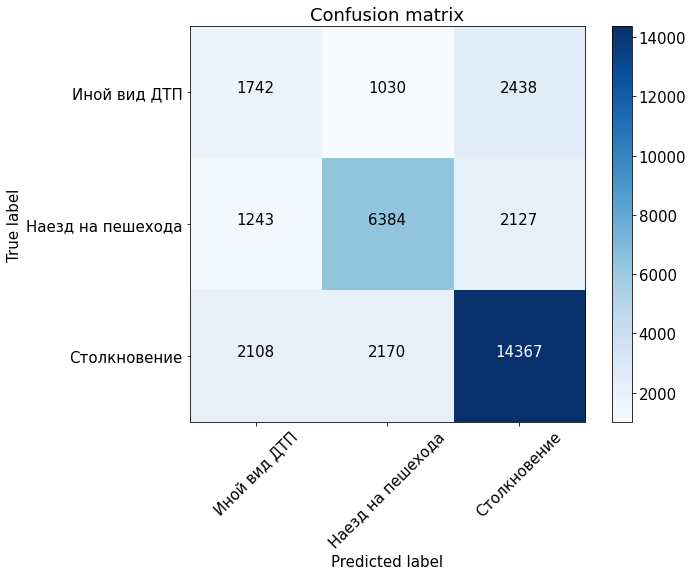

Точность модели составляет : 66.92552590080038


In [32]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, prediction)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)

# Тестируем модель (17) на данных ДТП 2019 года

In [33]:
dfl = df[df['date'].dt.year == 2019]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

[[ 1576   790  2343]
 [ 1067  5358  1942]
 [ 1768  2072 12512]]


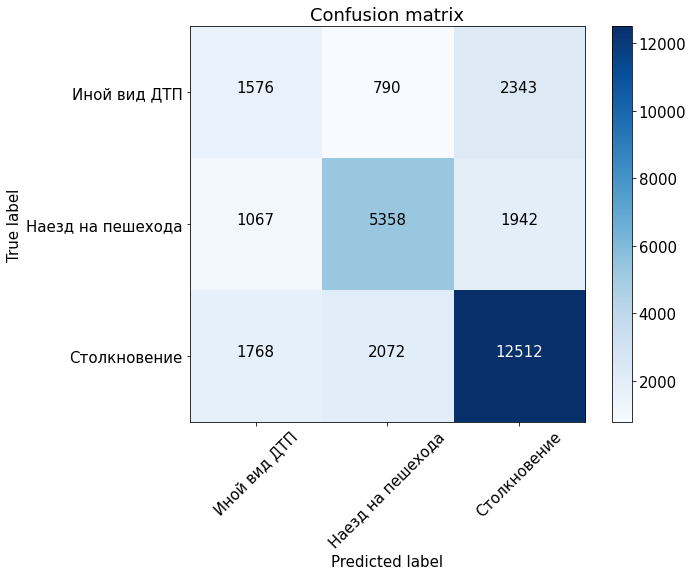

Точность модели составляет : 66.07992388201713


In [34]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, prediction)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)

# Обучаем модель KNN на данных ДТП 2018 года

In [35]:
dfl = df[df['date'].dt.year == 2018]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

# Тестируем модель (18) на данных ДТП 2018 года

[[ 1736  1044  2336]
 [  877  7028  1899]
 [ 2324  2096 14269]]


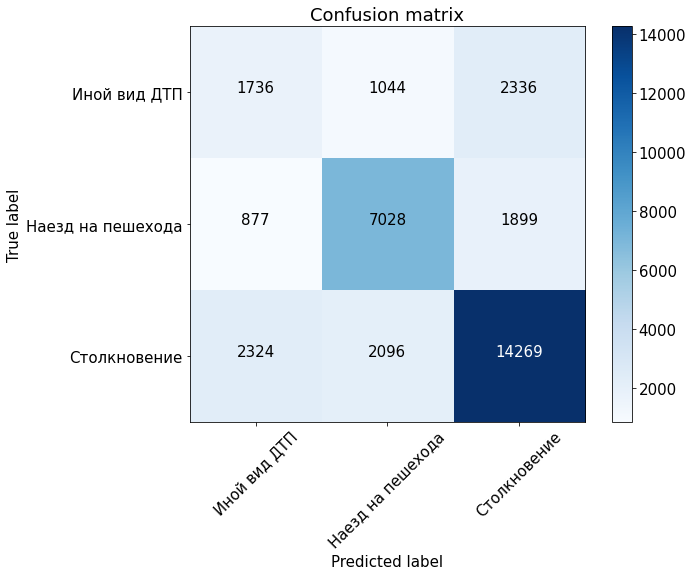

Точность модели составляет : 68.53223838852688


In [37]:
prediction = knn.predict(X_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y_test,prediction)*100)

# Тестируем модель (18) на данных ДТП 2019 года

In [38]:
dfl = df[df['date'].dt.year == 2019]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

[[ 1522   853  2344]
 [  799  5894  1646]
 [ 2051  1837 12482]]


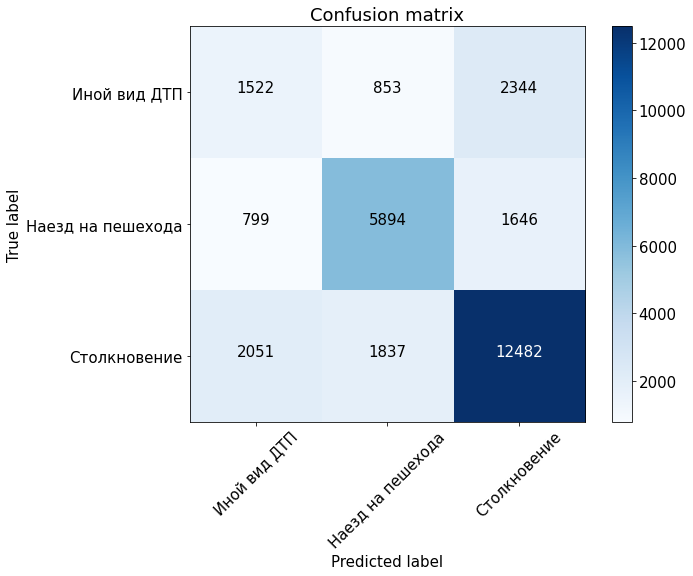

Точность модели составляет : 67.61587603642789


In [39]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, prediction)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)

# Обучаем модель KNN на данных ДТП 2019 года и тестируем на 2019 год

In [40]:
dfl = df[df['date'].dt.year == 2019]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

[[ 2171   671  1810]
 [  971  5771  1554]
 [ 2469  1639 12372]]


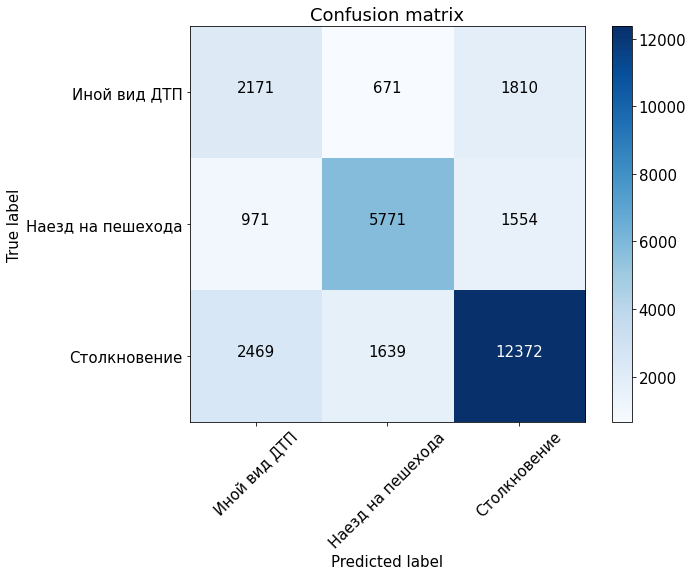

Точность модели составляет : 69.02949571836346


In [41]:
prediction = knn.predict(X_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y_test,prediction)*100)

# Модель KNN для 5 лет данных ДТП

[[ 7164  4298 14772]
 [ 3664 37131  9776]
 [ 8554  9026 74020]]


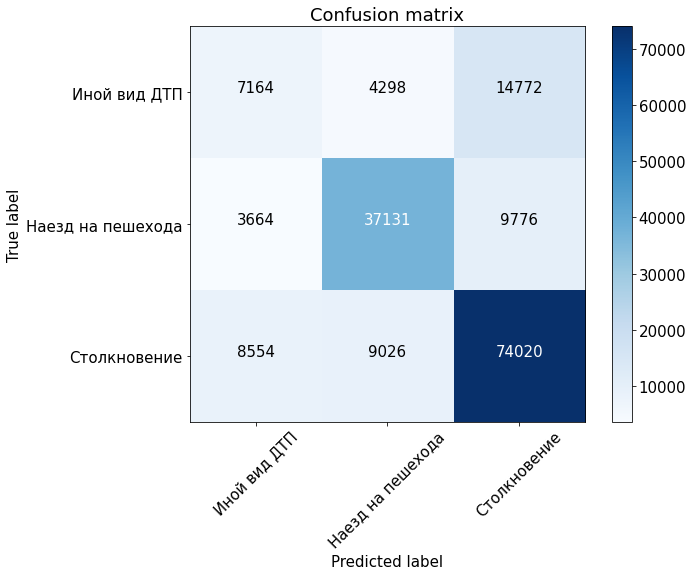

Точность модели составляет : 70.25622754668804


In [42]:
X = df[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = df['dtp_v']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y_test,prediction)*100)

## Лучший показатель точности имеет модель, обученная на данных 2015 года, протестированная на 2017 году 70.9% 

#  Оценка важности каждого атрибута 

## Смотрим на показатели модели, включающей все атрибуты

In [43]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)
f = accuracy_score(y_test,y_pred)*100

Точность модели составляет : 70.25750059059769


## Оцениваем параметр Освещение 

In [47]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       #'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       #'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

Точность модели составляет : 71.17292700212616
Потеря точности составляет: -0.6742611674505881


## Оцениваем параметр Алкогольное опьянение 

In [48]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       #'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       #'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

Точность модели составляет : 70.33132530120481
Потеря точности составляет: -0.48394551534759955


## Оцениваем параметр Состояние дорожного полотна 

In [49]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[[#'s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

dfl = df[df['date'].dt.year == 2017]
X = dfl[[#'s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

Точность модели составляет : 70.08327427356484
Потеря точности составляет: -0.6470732171501581


## Оцениваем параметр Изменение режима движения 

In [50]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       #'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       #'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

Точность модели составляет : 69.68462083628633
Потеря точности составляет: -0.6606671923003731


## Оцениваем параметр Участие лиц женского пола в ДТП

In [51]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       #'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       #'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

Точность модели составляет : 71.69855894164895
Потеря точности составляет: -0.554634186128709


## Оцениваем параметр Состояние метеусловий

In [52]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       #'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       #'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

Точность модели составляет : 70.31065438223482
Потеря точности составляет: -0.30722383839482603


## Оцениваем параметр Фактор нарушения ПДД

In [53]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       #'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       #'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

Точность модели составляет : 63.140798488069926
Потеря точности составляет: -0.43772599983687144


## Оцениваем параметр Последствия ДТП

In [54]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       #'posled',
       'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       #'posled',
       'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

Точность модели составляет : 68.41188282541933
Потеря точности составляет: -0.8129197139827653


## Оцениваем параметр Объект дорожной сети

In [56]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled']]
       #'sdor']]
Y = dfl['dtp_v']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled']]
       #'sdor']]
Y = dfl['dtp_v']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
prediction = knn.predict(X1_test)
print('Точность модели составляет :',accuracy_score(y1_test,prediction)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

Точность модели составляет : 56.52610441767069
Потеря точности составляет: -0.3126614284549092


## Изобразим оценку важности атрибутов на диаграмме

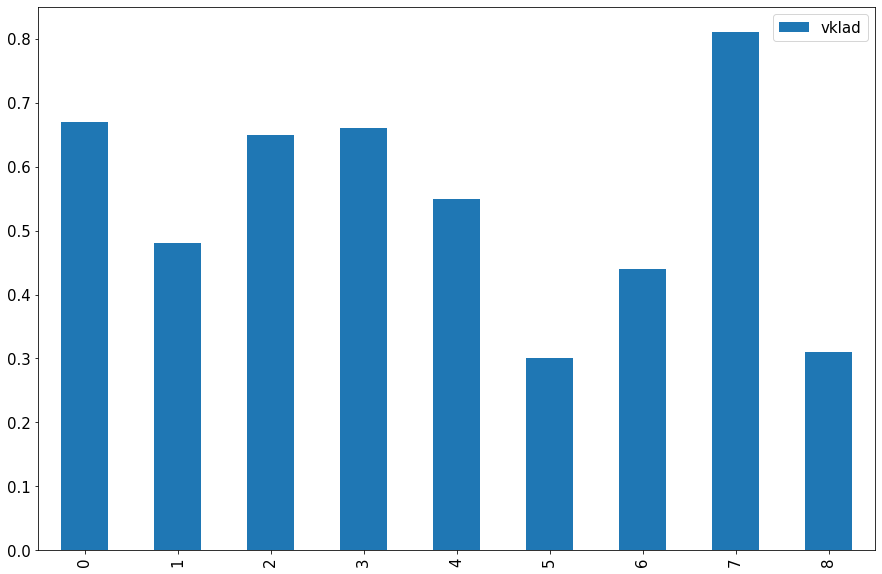

In [58]:
per.plot.bar(figsize=(15, 10))

## Все атрибуты в модели KNN являются одинаково важными. Но каждый атрибут отдельно не сильно влияет на модель

## График падения точности

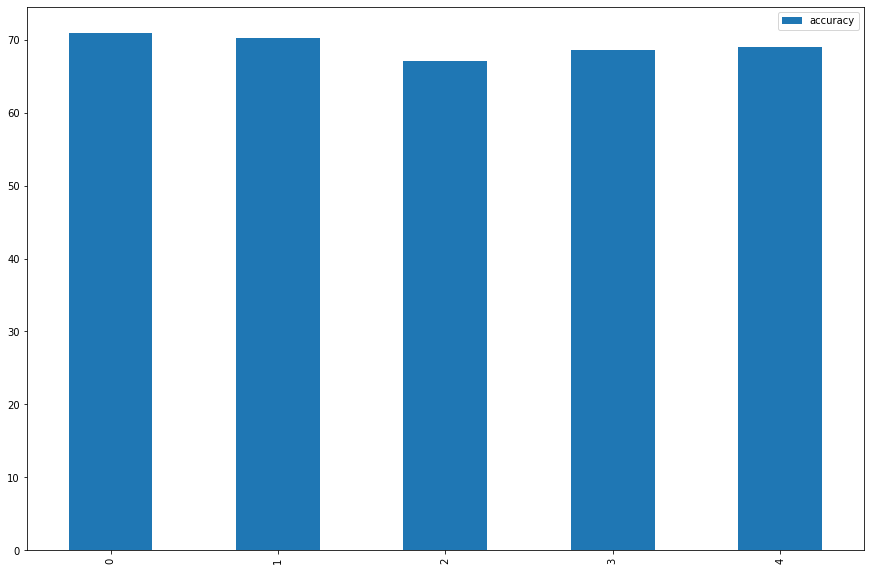

In [8]:
per.plot.bar(figsize=(15, 10))

# Вывод по модели KNN()

## Алгоритм работает с классом "Иные виды дтп". Но, несмотря на то, что алгоритм смотрит просто по соседям, общая точность модели - выше линейной векторной.
## Модель, обученная на данных 2015 года, показала лучшую точность - 70%
## Модель не выявляет значительных падений точности при исключении отдельных атрибутов. Их значимость для модели приблизительно одинакова.